<h1 align='center'> SMC - TD4 </h1>
<h4 align='right'><i> author: Hicham Janati </i></h4>
<h3> Loi géométrique  </h3>

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

Soit $X \sim exp(\lambda)$. Montrez que la partie entière de X suit la loi géométrique à préciser.

In [2]:
def geometric(p, n, seed=None):
    """Geometric generator using inverse method of exponential distribution.
    p: probability of success parameter.
    n: int.
        number of samples.
    seed: int (optional).
        random seed initialization.
    """
    # init generator
    rnd = np.random.RandomState(seed)
    
    # generate U, uniform
    U = rnd.rand(n)
    
    gamma = np.log(1 - p)
    # generate X, exponential(gamma)
    X = np.log(U) / gamma
    
    # Take integer part of X
    Y = np.floor(X) + 1
    return Y

In [3]:
n, p = 1000, 0.5
Y = geometric(p, n)

Let's estimate it's CDF. To do that, we need to only need to sort the entries and compute a cumulative mean. Suppose $y^1, \dots, y^n$ are sorted entries of Y, the empirical CDF is given by:

$$ CDF_n(y) =\frac{1}{n}\sum_{i=1}^n\iota_{y^i <= y} $$

The theoretical CDF is given by:
$$ F(k) = 1 - (1-p)^{k + 1}$$

Draw CDF vertically:

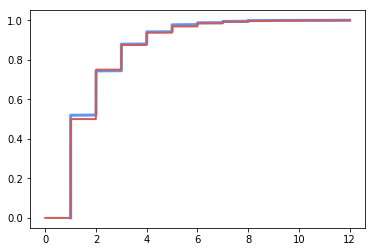

In [4]:
plt.figure()
ysorted = np.sort(Y)
plt.plot(ysorted, np.linspace(0, 1, len(Y)), color='cornflowerblue', lw=3) # Empirical CDF
grid = np.linspace(0., Y.max(), 1000)
cdf_true = 1 - (1 - p) ** (np.floor(grid)) # true cdf
plt.plot(grid, cdf_true, color='indianred', lw=2)
plt.show()

Draw CDF horizontally:

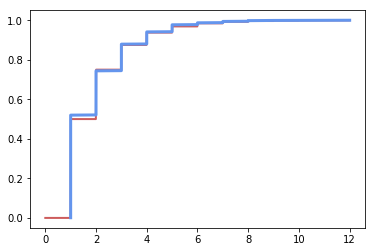

In [5]:
plt.figure()
ysorted = np.sort(Y)
grid = np.linspace(0, Y.max(), len(Y))
gridx = np.linspace(1, Y.max(), len(Y))
cdf = (ysorted <= gridx).cumsum() / len(ysorted)
cdf_true = 1 - (1 - p) ** (np.floor(grid)) # true cdf
plt.plot(grid, cdf_true, color='indianred', lw=2)
plt.plot(ysorted, cdf, color='cornflowerblue', lw=3) # Empirical CDF
plt.show()